In [4]:
# Run this first!!!

from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import sys
sys.path.append('../aho_merging')
import distribution_analysis as dists

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Is the Lemma Even Necessary?

I think that the lemma was note even necessary for the proof in the first place. Recall that we needed this lemma for case two of what we were looking at. Case two was as follows:

$$
\mathcal{C}_2 = \sum_\gamma c_{1,2}^\gamma c_2^{k - 2 \gamma} = \sum_\gamma \left(\frac{c_{1,2}}{c_2^2}\right)^\gamma c_2^k 
$$

There are two different scenarios that we can explore from this point: one where the lemma holds (i.e. $c_2^2 \leq c_{1, 2}$) and one where the lemma does not hold (i.e. $c_2^2 > c_{1, 2}$). Where the lemma does hold the proof follows in the same way as before. If it does not hold then $\frac{c_{1,2}}{c_2^2} < 1$ implying that...

$$
\mathcal{C}_2 \leq \left(\frac{k}{2}\right) c_2^k = \frac{1 + \varepsilon}{2}log_{1/c_2}(n) \left(\frac{1}{n^{1 + \varepsilon}}\right) \rightarrow 0
$$

So in either case we see that we can provide an upper bound that goes to 0 as $n$ tends to infinity.


# Analyzing Distribution of Number of States

The next step that I would like to take is to say something about the distribution for how many states are needed to construct the automaton given some randomly formed generalized string. Let $X_{\ell, p}$ be the random variable describing the number of states needed for the minimal DFA given that $\ell$ is the length of the random generalized strings and the letters of the alphabet are seen with probabilities according to vector $p$.To start I will assume that all letters in the alphabet are seen with 0.5 probability conditioned on the fact that there is at least one letter in each set. 

## Linear Regression

The first thing I will try for this is looking to see if I can draw many samples over different lengths and doing linear regression to try and find a trend. The results of this are shown below. It seems that there is a pretty clear relationship here as length increases and it looks to be linear. However, there also appears to be some weird structure with higher lengths where there are fewere number of states present.

In [23]:
def linear_regression(lengths, num_samples, probs):
    group = dists.DistributionGroup([(length, probs) for length in lengths])
    group.draw_samples(num_samples)
    frame = group.get_all_samples()
    model = smf.ols(formula='num_states ~ length', data=frame).fit()
    return model

def plot_model(model):
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    plt.show()

                            OLS Regression Results                            
Dep. Variable:             num_states   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.371e+04
Date:                Sun, 09 Jul 2017   Prob (F-statistic):               0.00
Time:                        19:52:37   Log-Likelihood:                -2019.1
No. Observations:                 570   AIC:                             4042.
Df Residuals:                     568   BIC:                             4051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3971      0.730      0.544      0.5

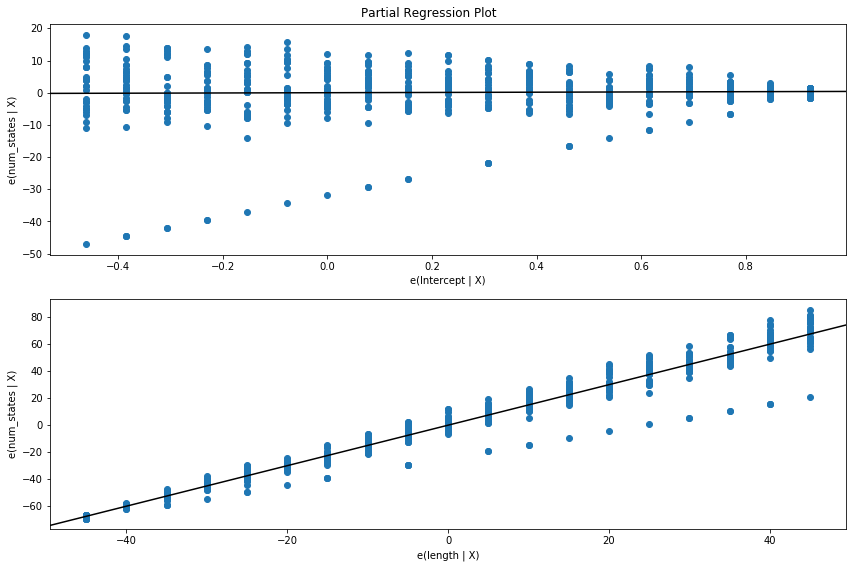

In [24]:
# PARAMETERS
LENGTHS = range(5, 100, 5) # The length of generalized strings to draw samples from.
PROBS = [0.5, 0.5, 0.5, 0.5] # The probabilities of seeing particular letters.
NUM_SAMPLES = 30 # Number of samples to draw at each length.

model = linear_regression(LENGTHS, NUM_SAMPLES, PROBS)
print model.summary()
plot_model(model)

# Further Work
I think that, while this model is interesting, I should focus on things more specific to the algorithm that we have made from here on out. That is because anyone would have been able to make this model through implementing a different solution of making a minimal DFA.